## Create ship profile

This notebook creates a (dummy) ship profile. For a more sophisticated ship profile, see https://github.com/euronion/trace/blob/pypsa-eur-sec-imports-atlite/actions/create_network.py.ipynb. Config details: https://github.com/euronion/trace/blob/pypsa-eur-sec-imports-atlite/data/shipping.csv

In [50]:
import pandas as pd

In [70]:
export_volume = 9 # TWh # yearly export volume
ship_capacity = 0.4 # TWh # 0.05 TWh for new ones, 0.003 TWh for Susio Frontier, 0.4 TWh according to Hampp2021: "Corresponds to 11360 t H2 (l) with LHV of 33.3333 Mwh/t_H2. Cihlar et al 2020 based on IEA 2019, Table 3-B"
travel_time = 12*24 # hours # From Agadir to Rotterdam and back
fill_time = 24 # hours, for 48h see Hampp2021
unload_time = 24 # hours for 48h see Hampp2021

In [52]:
landing = export_volume / ship_capacity # fraction of max delivery

In [53]:
pause_time = 8760/landing - (fill_time+travel_time)

In [54]:
full_cycle = fill_time + travel_time + unload_time + pause_time

In [55]:
max_transport = ship_capacity * 8760/(fill_time + travel_time + unload_time)
max_transport
print(f"The maximum transport capacity is {max_transport:.2f} TWh/year")

The maximum transport capacity is 9.12 TWh/year


In [56]:
# throw error if max_transport < export_volume
if max_transport < export_volume:
    raise ValueError('Not enough ship capacity to export all hydrogen')

In [57]:
# Set fill_time ->  1 and travel_time, unload_time, pause_time -> 0

ship = pd.Series([1.0] * fill_time + [0.0] * int(travel_time + unload_time + pause_time)) #, index)
ship = pd.concat([ship]*1000, ignore_index=True) # extend ship series to above 8760 hours
ship = ship[:8760]

In [58]:
# Add index
index = pd.date_range(start="2013-01-01 00:00", end="2013-12-31 23:00", freq='H')
ship.index = index

<AxesSubplot:>

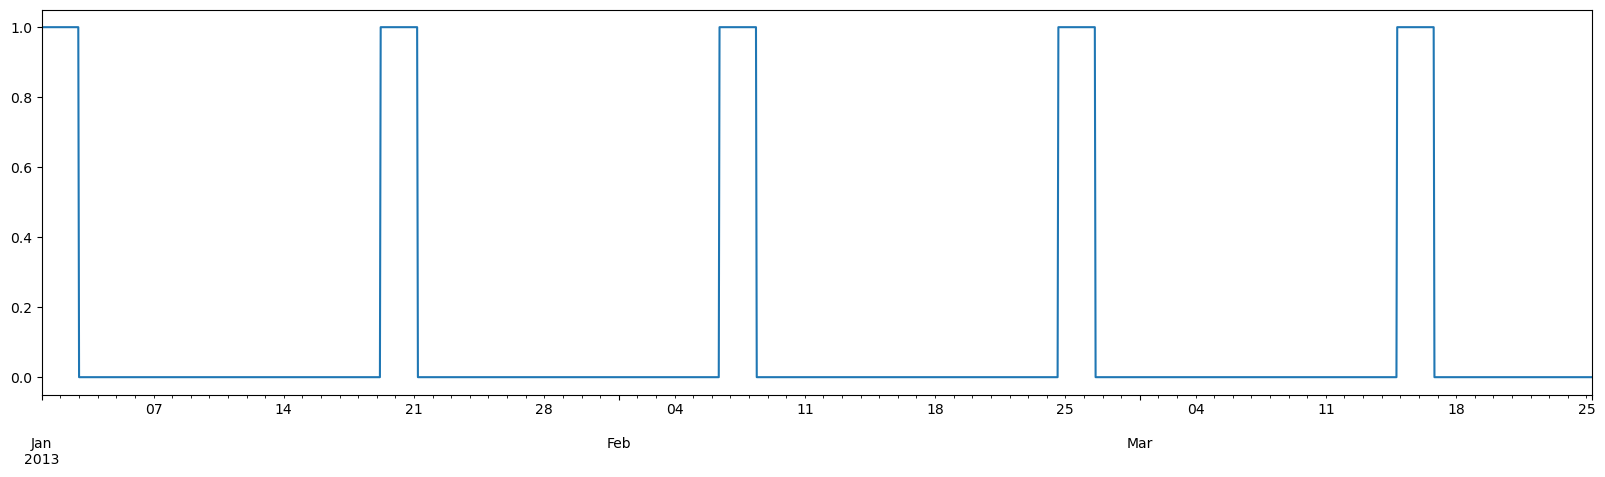

In [59]:
ship[:2000].plot(figsize=(20,5))

Save the profile

In [80]:
ship.to_csv('../../resources/ship_profile.csv', header=False)

In [78]:
# Read the profile (for implementation in `prepare_sector_network.py`)
#ship = pd.read_csv('../../resources/ship_profile.csv', header=None, index_col=0)

In [79]:
ship.head()

,1
0,
2013-01-01 00:00:00,1.0
2013-01-01 01:00:00,1.0
2013-01-01 02:00:00,1.0
2013-01-01 03:00:00,1.0
2013-01-01 04:00:00,1.0


Multiply profile with annual demand

In [65]:
ship_abs = ship/ship.sum() * export_volume * 1e6 # in MWh

In [69]:
# Check the total sum
ship_abs.sum()/1e6

9.0

<AxesSubplot:>

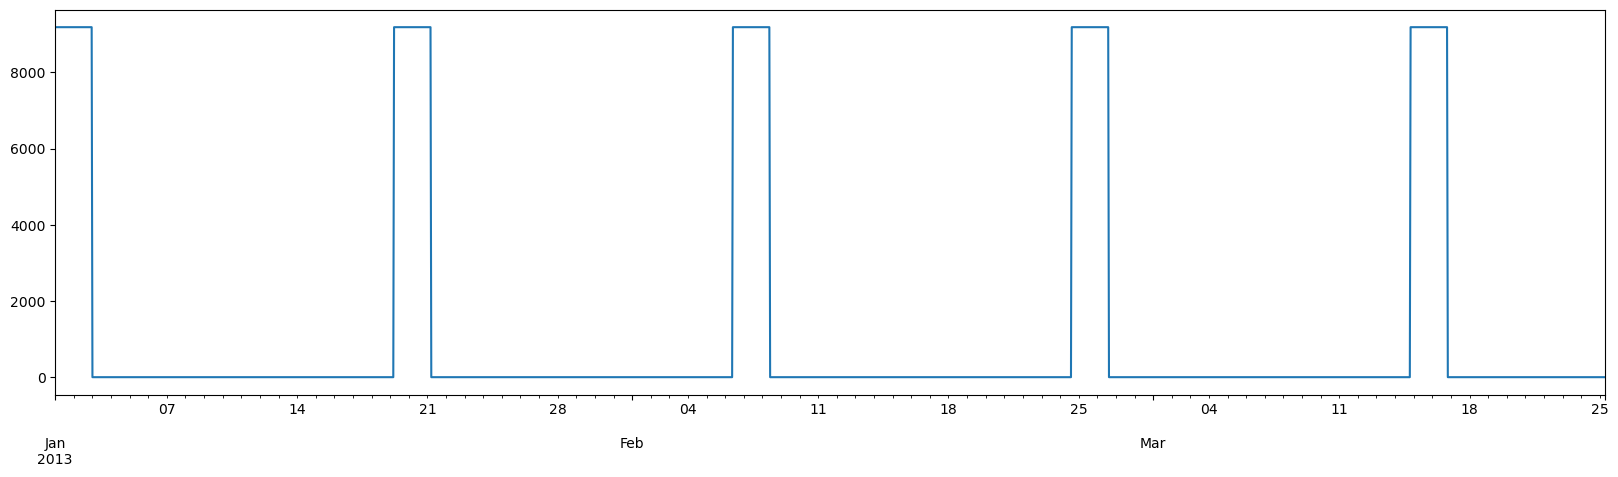

In [66]:
ship_abs[:2000].plot(figsize=(20,5))